In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/CSV/no2Kmeans - Sheet1.csv'

df = pd.read_csv(path)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,5.098573,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,24.916035,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.750000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.559725,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.554100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,987.000000,500001.000000


In [ ]:
df_new = df[["longitude","latitude"]]
df_new.head

<bound method NDFrame.head of        longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]>

In [ ]:
df_new.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


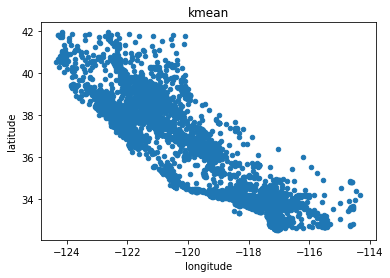

In [ ]:
df.plot(kind='scatter',x='longitude', y='latitude')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('kmean')
plt.show()

In [ ]:
df = df[["longitude","latitude"]]
df.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [ ]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans =KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

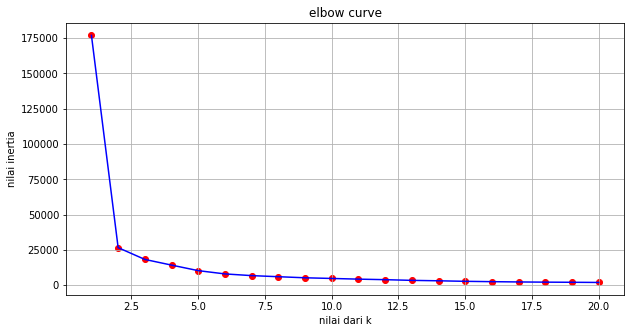

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('nilai dari k')
plt.ylabel('nilai inertia')
plt.title('elbow curve')
plt.show()

In [ ]:
k = 3
np.random.seed(49)

random_centroids=[]
for i in range(1,k+1):
   random_centroids.append([np.random.randint(1,20), np.random.randint(1,20)])
print('Randomly selested points as random_centroids:',random_centroids)

Randomly selested points as random_centroids: [[11, 14], [9, 19], [13, 6]]


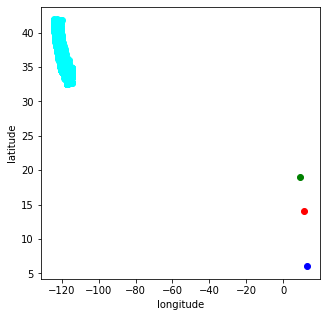

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color="cyan")
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()